In [451]:
reviews = [
     "Отличный продукт! Рекомендую всем!",
    "Сервис на высшем уровне. Быстрая доставка.",
    "Очень доволен качеством товара.",
    "Отличное обслуживание. Спасибо!",
    "Прекрасный опыт покупки. Все супер!",
    "Великолепный выбор товаров. Спасибо магазину!",
    "Качество на высоте. Все сделано аккуратно.",
    "Быстрая доставка и отличное качество.",
    "Отзывчивый персонал. Все претензии решаются быстро.",
    "Очень доволен покупкой. Рекомендую магазин.",
    "Ужасное качество. Не стоит своих денег.",
    "Неудачный опыт. Никогда больше не куплю.",
    "Товар пришел в плохом состоянии.",
    "Плохое обслуживание. Долгая доставка.",
    "Ужасный выбор товаров. Не рекомендую.",
    "Отвратительный сервис. Никому не советую.",
    "Получил бракованный товар. Разочарован.",
    "Неудовлетворительное качество товара.",
    "Плохой опыт покупки. Переоцененные цены.",
    "Жалею о покупке. Не соответствует ожиданиям.",
]

In [452]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
stop_words = set(["и", "о", "в", "на"])

lowercase_reviews = [review.lower() for review in reviews]
def custom_preprocessor(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

vectorizer = CountVectorizer(preprocessor=custom_preprocessor)
X = vectorizer.fit_transform(lowercase_reviews)

In [453]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X)

In [454]:
from sklearn.linear_model import LinearRegression
y = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
model = LinearRegression()
model.fit(X_tfidf, y) 

LinearRegression()

In [455]:
coefficients = model.coef_
print("Коэффициенты модели:", coefficients)

Коэффициенты модели: [ 0.22672769 -0.13844397 -0.20685128  0.47697122  0.15538215  0.34467314
  0.5638014   0.31659255 -0.05239984  0.22672769  0.25634174 -0.13657103
  0.42116926 -0.42411195  0.0939976  -0.14071344 -0.10381945  0.33883161
 -0.13844397  0.14030595  0.34467314 -0.682075   -0.13844397 -0.5193202
 -0.13844397 -0.19469119 -0.1355286  -0.14071344 -0.09942536 -0.19469119
  0.15538215  0.4889152   0.31659255  0.42116926 -0.31561287  0.15538215
 -0.42411195 -0.31561287 -0.20685128 -0.14071344  0.01150888  0.14030595
 -0.20685128  0.32870579  0.15538215 -0.20685128  0.31659255 -0.20685128
  0.04173164  0.15538215 -0.13657103  0.22672769  0.05419178 -0.19469119
 -0.14071344 -0.20685128  0.54024526 -0.13657103  0.32870579 -0.36365088
 -0.15865223 -0.05239984 -0.13657103 -0.40428511  0.25634174 -0.31561287]


In [456]:
print("Самые важные слова по весу:")
feature_names = vectorizer.get_feature_names_out()
coef_dict = dict(zip(feature_names, coefficients))

sorted_coef = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)
for word, coef in sorted_coef[:20]:
    print(f"{word}: {coef}")

Самые важные слова по весу:
все: 0.5638014023262876
спасибо: 0.5402452607642523
отличное: 0.48891520232820596
быстрая: 0.47697121831306144
доволен: 0.4211692560627236
очень: 0.4211692560627236
великолепный: 0.34467313670075106
магазину: 0.34467313670075106
качеством: 0.3388316141361776
прекрасный: 0.32870579197225996
супер: 0.32870579197225996
всем: 0.3165925499082204
отличный: 0.3165925499082204
продукт: 0.3165925499082204
высшем: 0.2563417407532019
уровне: 0.2563417407532019
аккуратно: 0.22672769355496455
высоте: 0.22672769355496455
сделано: 0.22672769355496455
быстро: 0.15538214626184807


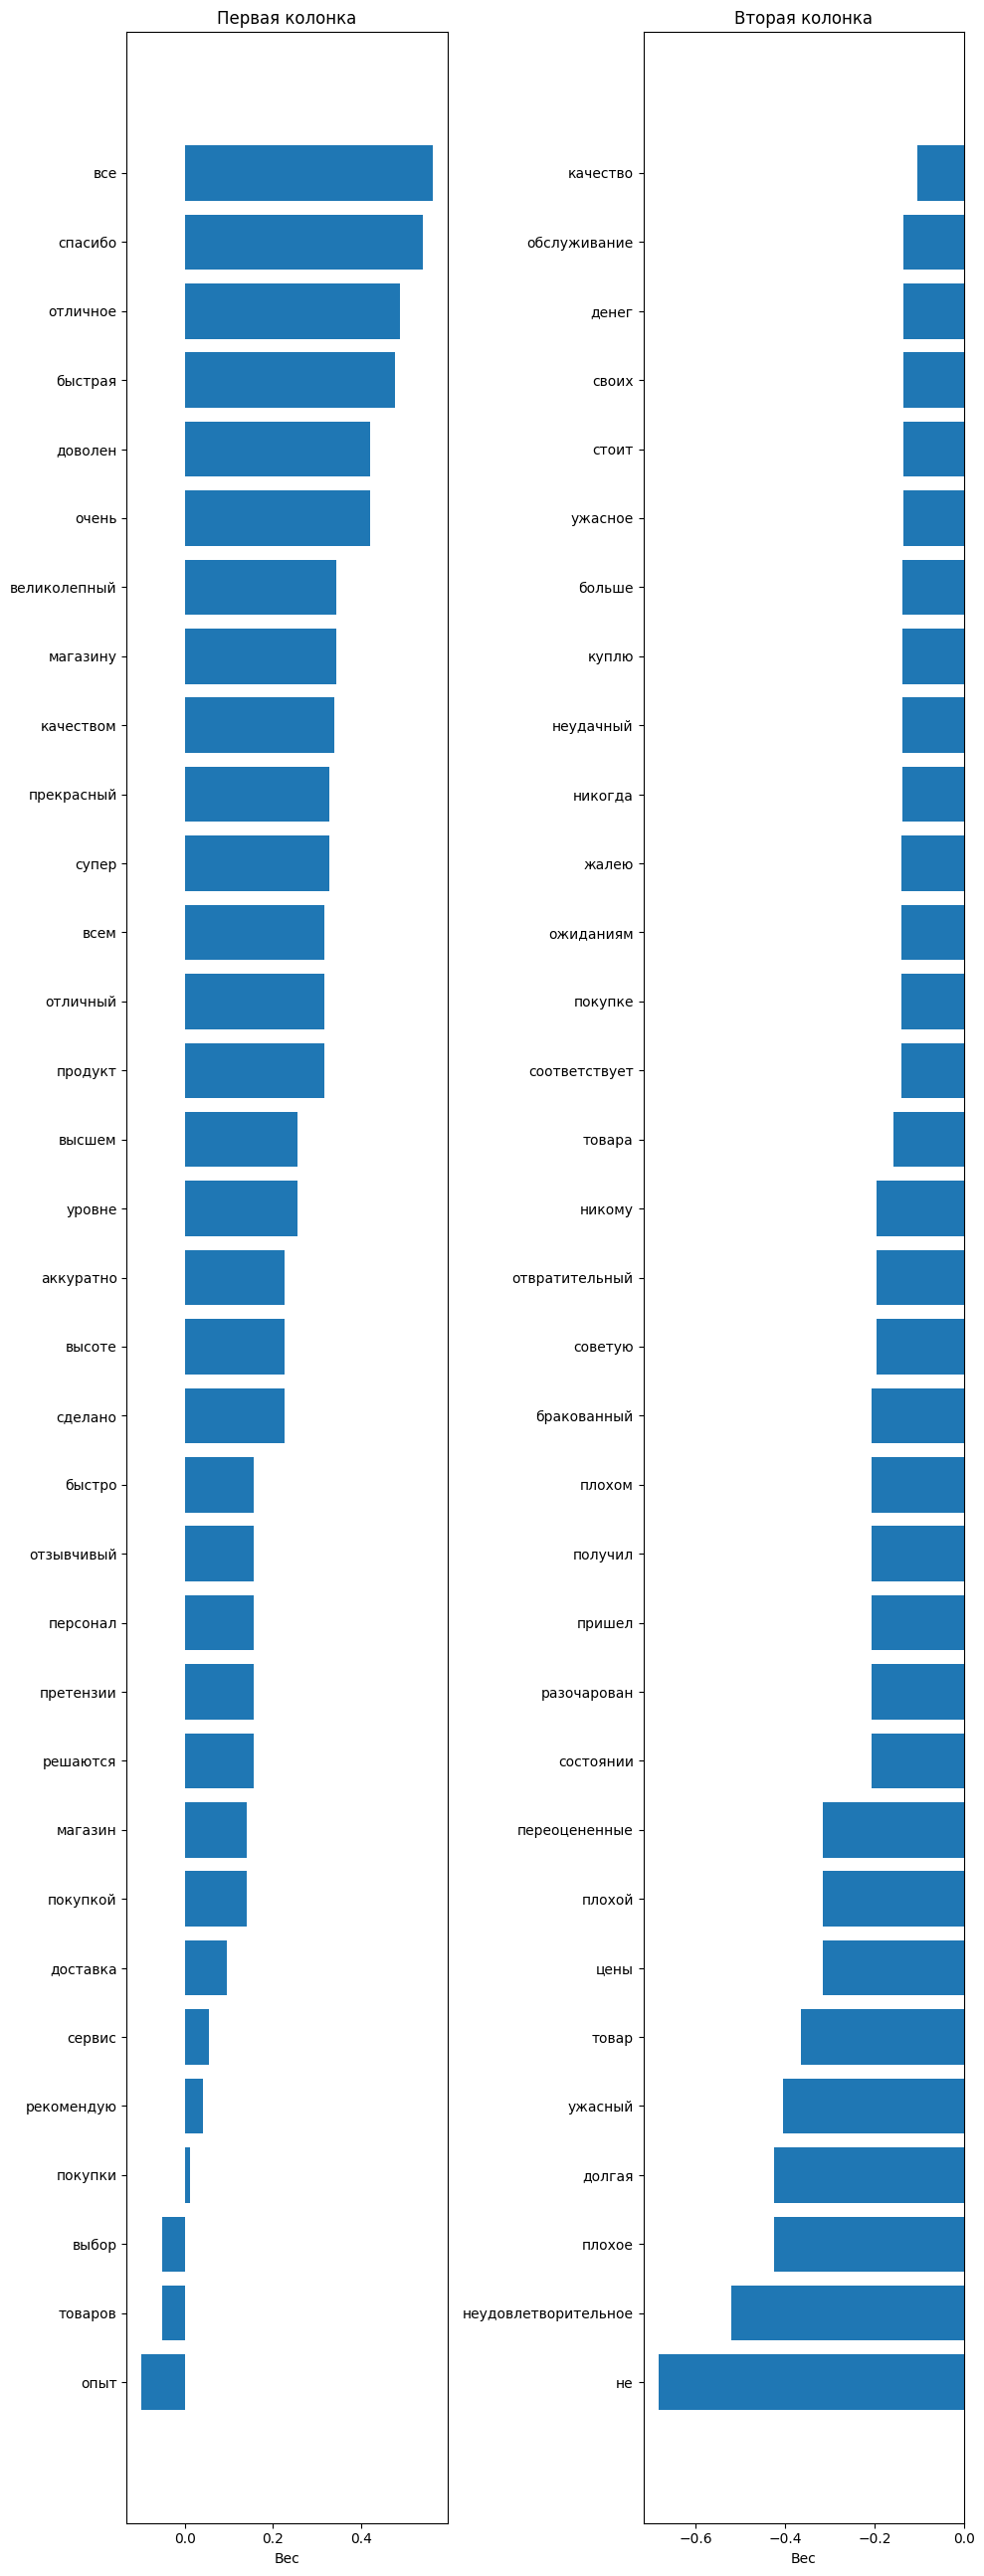

In [457]:
# Разделение слов и их коэффициентов
words, coefficients = zip(*sorted_coef)
# Создание графика

midpoint = len(words) // 2
words_col1, words_col2 = words[:midpoint], words[midpoint:]
weights_col1, weights_col2 = coefficients[:midpoint], coefficients[midpoint:]


fig, ax = plt.subplots(1, 2, figsize=(10, 26))
ax[0].barh(range(len(words_col1)), weights_col1)
ax[0].set_yticks(range(len(words_col1)))
ax[0].set_yticklabels(words_col1)
ax[0].invert_yaxis()
ax[0].set_xlabel('Вес')
ax[0].set_title('Первая колонка')

ax[1].barh(range(len(words_col2)), weights_col2)
ax[1].set_yticks(range(len(words_col2)))
ax[1].set_yticklabels(words_col2)
ax[1].invert_yaxis()
ax[1].set_xlabel('Вес')
ax[1].set_title('Вторая колонка')

plt.tight_layout()
plt.show()

<h1>Вывод:</h1>
Самые важные слова по весу: все, спасибо,отличное, быстрая
Самые не важные слова по весу: не, неудовлетрорительное, плохое, долгая

Мои отзывы распределены явно, первые 10 положительные, вторые 10 отрицательные.
поэтому в конце отрицательные значения, а в начале положительные.

Использовал линейную регрессию с tf-idf масштабированием данных.